Problem Statement: To analyze supermarket sales across different branches and provide insight to understand the customer better.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
sns.set


<function seaborn.rcmod.set(*args, **kwargs)>

Data Collection

In [6]:
df=pd.read_csv("supermarket_sales - Sheet1.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1009 non-null   object 
 1   Branch                   1009 non-null   object 
 2   City                     1009 non-null   object 
 3   Customer type            1009 non-null   object 
 4   Gender                   1009 non-null   object 
 5   Product line             1009 non-null   object 
 6   Unit price               1009 non-null   float64
 7   Quantity                 1000 non-null   float64
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage 

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Data Cleaning

In [ ]:
df.shape

(1009, 17)

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   9
Tax 5%                     9
Total                      9
Date                       9
Time                       9
Payment                    9
cogs                       9
gross margin percentage    9
gross income               9
Rating                     9
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.duplicated().sum()

0

Exploratory Data Analysis

In [ ]:
df["Rating"].describe()

count    1000.00000
mean        6.97270
std         1.71858
min         4.00000
25%         5.50000
50%         7.00000
75%         8.50000
max        10.00000
Name: Rating, dtype: float64

In [ ]:
df["gross income"].describe()

count    1000.000000
mean       15.379369
std        11.708825
min         0.508500
25%         5.924875
50%        12.088000
75%        22.445250
max        49.650000
Name: gross income, dtype: float64

In [ ]:
df["gross margin percentage"].describe()

count    1000.000000
mean        4.761905
std         0.000000
min         4.761905
25%         4.761905
50%         4.761905
75%         4.761905
max         4.761905
Name: gross margin percentage, dtype: float64

In [ ]:
df["Payment"].describe()

count        1000
unique          3
top       Ewallet
freq          345
Name: Payment, dtype: object

In [ ]:
df["Total"].describe()

count    1000.000000
mean      322.966749
std       245.885335
min        10.678500
25%       124.422375
50%       253.848000
75%       471.350250
max      1042.650000
Name: Total, dtype: float64

In [ ]:
df["Product line"].describe()

count                    1000
unique                      6
top       Fashion accessories
freq                      178
Name: Product line, dtype: object

In [ ]:
df["Gender"].describe()

count       1000
unique         2
top       Female
freq         501
Name: Gender, dtype: object

In [ ]:
del df["Tax 5%"]

In [ ]:
df.shape

(1000, 16)

In [ ]:
min(df["Rating"])

4.0

In [ ]:
max(df["Rating"])

10.0

In [ ]:

max(df["gross income"])


49.65

Data Interpretation and Data Visualization

1. Popular payment method used by customers:

In [ ]:
freq=df["Payment"].value_counts()

print(freq)

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64


<Axes: xlabel='Payment', ylabel='count'>

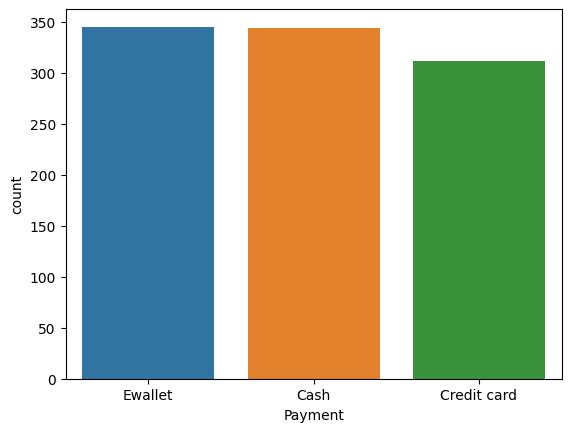

In [ ]:
sns.countplot(x ='Payment', data = df)

EWallet is popular payment method used by customers.

2. Which branch is the most profitable?

<Axes: xlabel='Branch', ylabel='gross income'>

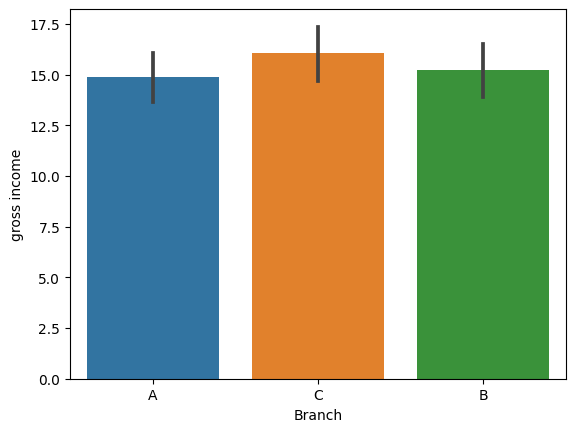

In [ ]:
sns.barplot(x=df["Branch"],y=df['gross income'])

C branch is the most profitable.

How many products are bought by customers?

In [ ]:
print(df.loc[df['Customer type']=='Member','Quantity'].sum())
print(df.loc[df['Customer type']=='Normal','Quantity'].sum())

2785.0
2725.0


<ipython-input-37-60a76de2811e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Quantity"])


([<matplotlib.axis.XTick at 0x7f15606bfcd0>,
 [Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10')])

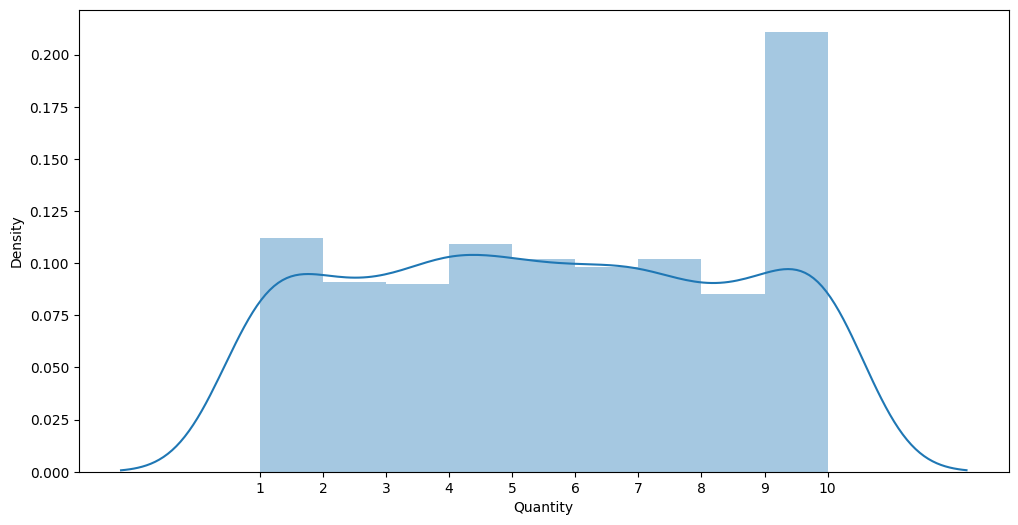

In [ ]:
x=[1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize=(12,6))
sns.distplot(df["Quantity"])
plt.xticks(x)

 What is the spending pattern of females and males and in which category do they spend a lot?

<Axes: xlabel='Product line', ylabel='count'>

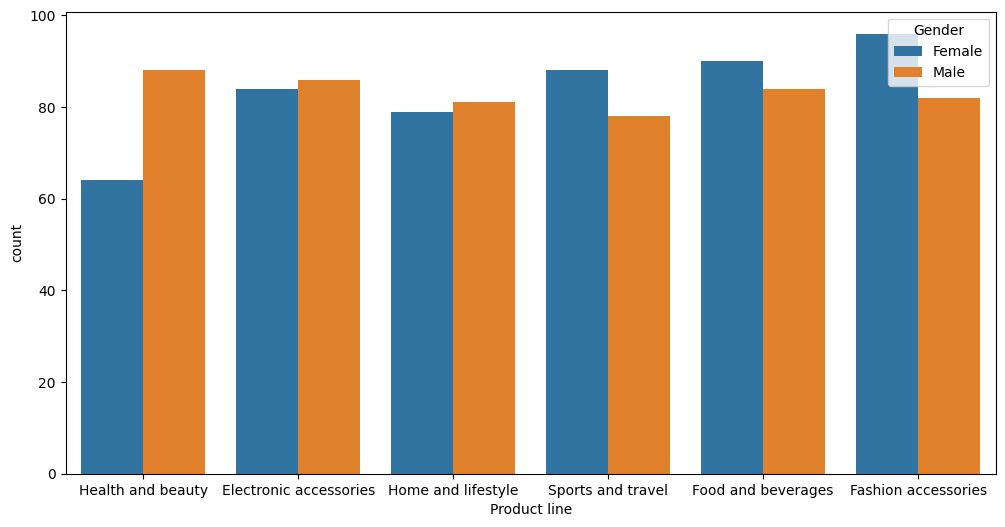

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="Product line", data=df,hue = df.Gender)

Which day of the week has maximum sales?

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['weekday'] = df['Date'].dt.day_name()
df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,weekday
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1,Saturday
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6,Friday
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4,Sunday
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4,Sunday
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3,Friday


<Axes: xlabel='weekday', ylabel='count'>

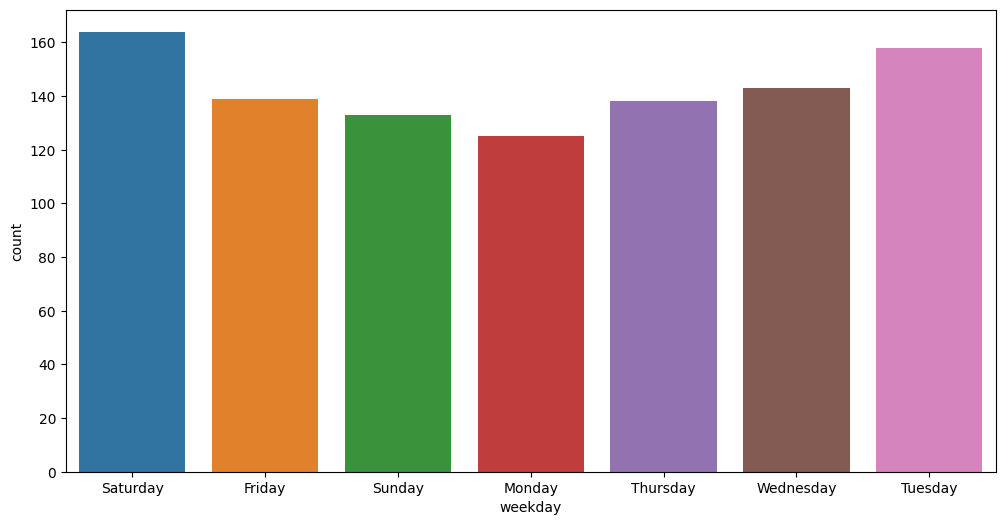

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="weekday",data=df)

Which city should be chosen for expansion and which products should it focus on?

<Axes: xlabel='Product line', ylabel='count'>

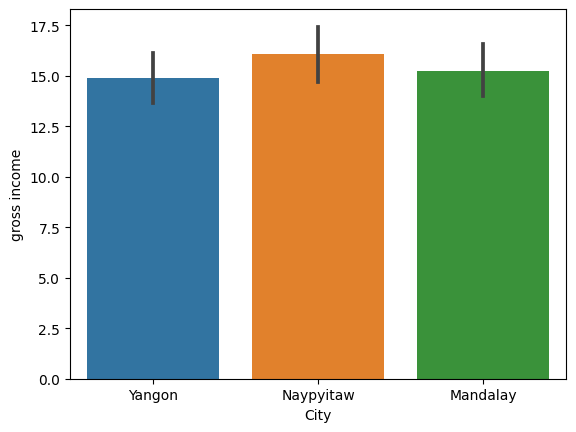

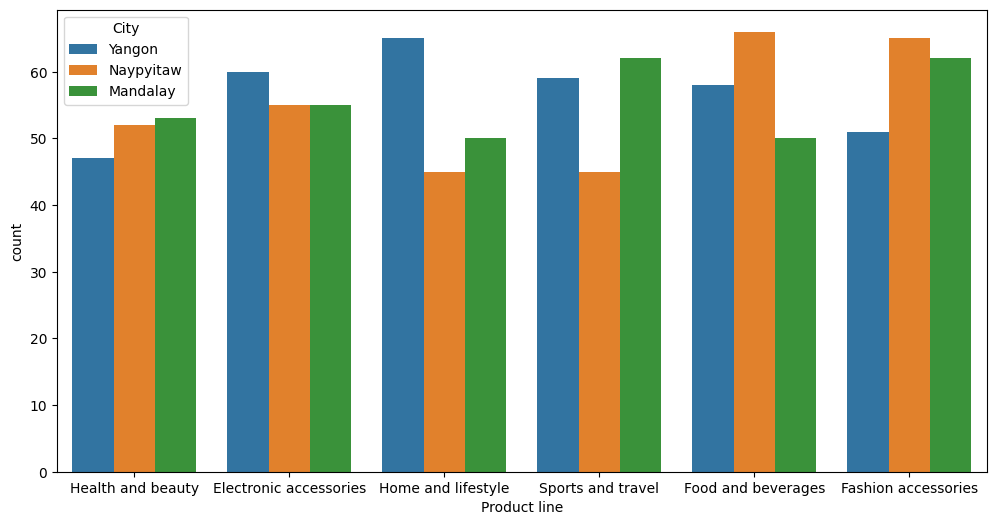

In [ ]:
sns.barplot(x=df["City"],y=df['gross income'])
plt.figure(figsize=(12,6))
sns.countplot(x=df["Product line"],hue=df.City)


From above we can say that it is best to say that compny should expand it's business in Naypyitaw city.



Is there any time trend in gross income?

<Axes: ylabel='gross income'>

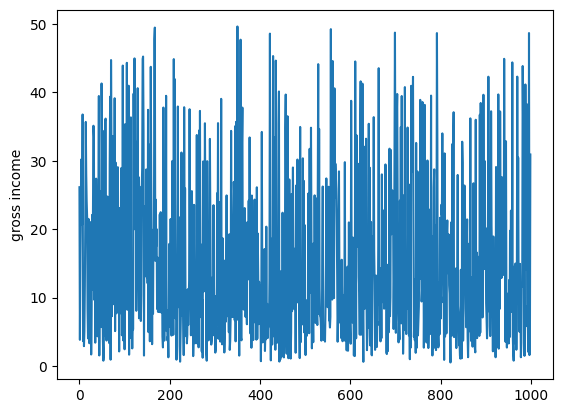

In [ ]:
sns.lineplot(x= df.groupby(df.index).mean().index, y = df.groupby(df.index).mean()['gross income'])


Which hour of the day is the busiest?

<ipython-input-43-1dc00d41e96b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Time'] = pd.to_datetime(df['Time'])
<ipython-input-43-1dc00d41e96b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Hour'] = (df['Time']).dt.hour


Text(0.5, 1.0, 'Product Sales per Hour')

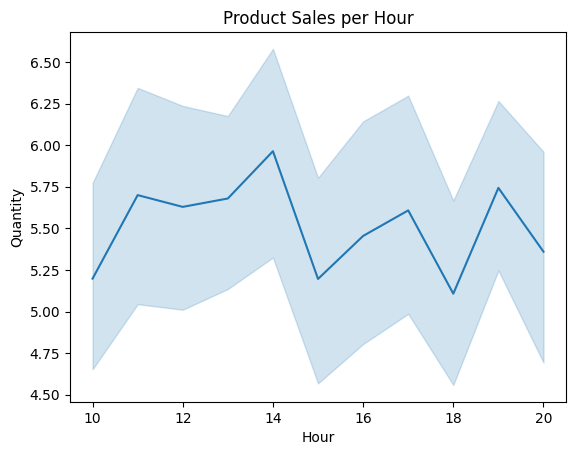

In [ ]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()
sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

Does gross income affect the ratings that the customers provide?

<Axes: xlabel='Rating', ylabel='gross income'>

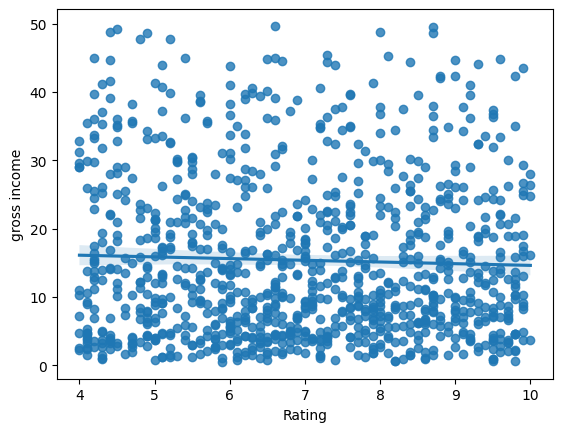

In [ ]:
sns.regplot(x='Rating', y='gross income',data=df)

Is there any relationship between Gender and Gross income?

<Axes: xlabel='Gender', ylabel='gross income'>

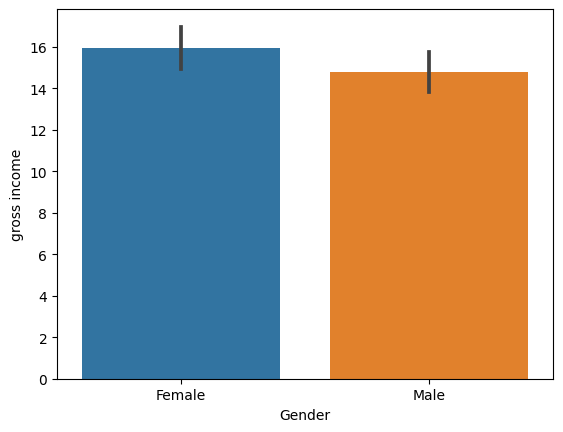

In [ ]:
sns.barplot(x=df['Gender'], y=df['gross income'])

<ipython-input-13-f1e9b1f35f39>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

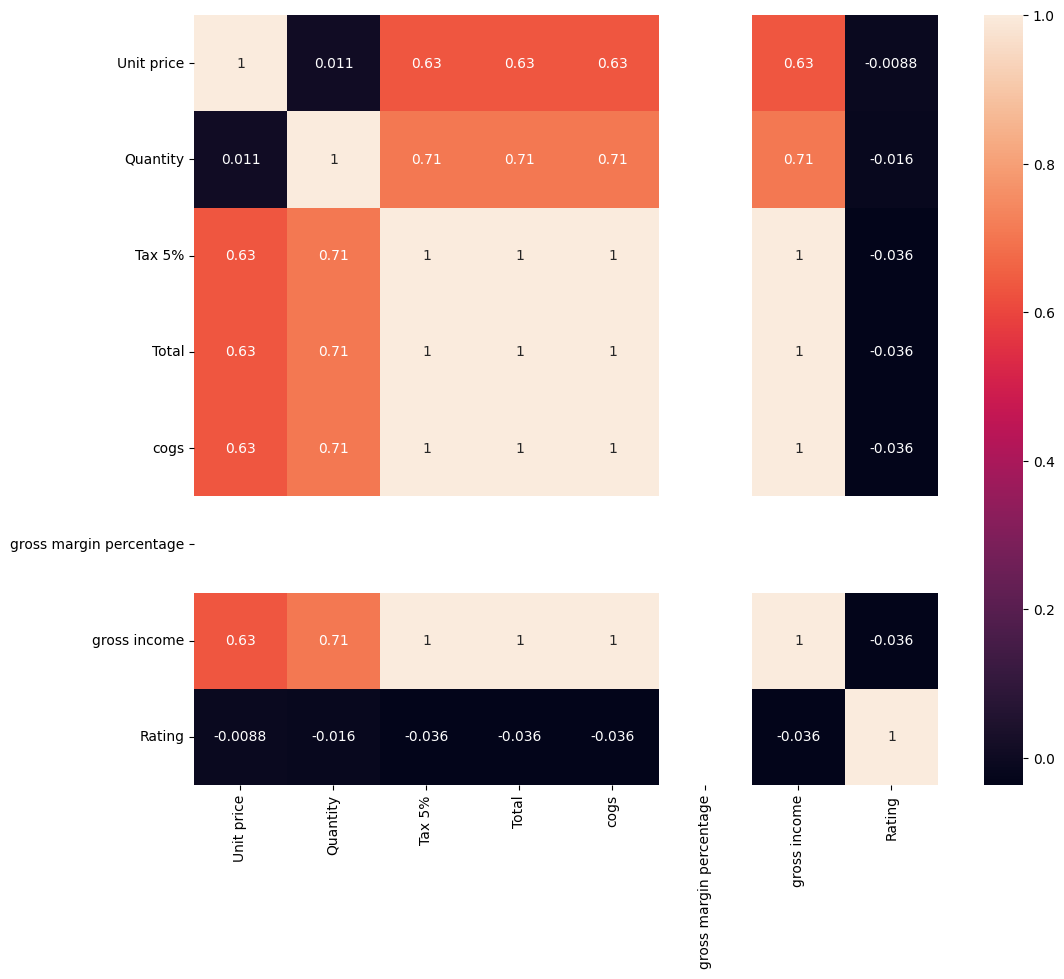

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True)